<b><font size=5>第１回：イントロダクション</font></b>

***
***

<b><font size=4>◯パターン認識とは</font>
<font size=2>　パターン認識とは、広い意味では人間が行っているような認知を機械に行わせることを指す。<br>
- 画像: デジカメの顔認識、郵便の自動仕分け、画像認識
- 音声: スマートフォンの音声入力、コールセンターの自動応答
- 文章: メールフィルタリング、テキスト検索、テキスト分類
- モーション: タッチパネル、ゲーム機のインターフェース<br>

　最も基本的なパターン認識の形は、<font color="Red">データがそれを表すものの属すクラスに分類すること</font>である。今後は、「パターン認識」といったら、この種類の処理を指す。
</font></b>

<b><font size=2>　数学的に言えば、入力データのドメイン$\Omega$とクラスの集合$C=\{c_1,c_2,\ldots\}$に対して画像データをクラスに割り当てる関数 $f: \Omega\rightarrow C$で、できるだけ誤りのないものを構築することが目標となる。</font><br>
※なお、「できるだけ誤りのない」という事の意味については後述。</b>

<b><font size=2>　一般に入力データのドメインは非常に高次元の空間になる。例えば、240×320pxでRGBの3チャンネルからなる画像は3×240×320=230400個の数値からなる。つまり、このサイズの画像は約23万次元の空間に分布するということになる。</font></b>

<b><font size=2>　従って、<font color='Red'>識別制度をできるだけ損なわずに入力データの次元を削る</font>という事が重要になる。<br>
また、次元削減にも限度があるため、<font color='Red'>高次元のデータを効率的に処理する</font>ための数学的な工夫・アルゴリズム的な工夫も重要になる。</font></b>

<b><font size=4>◯パターン認識の流れ</font><br>
1. 前処理（正規化）: <br>
いらない
情報を捨てる。（位置、大きさ、向き、色などは文字の種類と無関係）
2. 特徴抽出: <br>
識別に用いる特徴量を抽出し、次元を削減する。（解像度を調整して、ピクセルの画素値を特徴量にする）
3. 識別: </b>

<img src="http://nineties.github.io/prml-seminar/fig/pattern-recognition-flow1.png" width="600" height="600">

***

<img src="http://nineties.github.io/prml-seminar/fig/pattern-recognition-flow2.png" width="300" height="300">

<img src="http://nineties.github.io/prml-seminar/fig/pattern-recognition-flow3.png" width="300" height="300">

<img src="http://nineties.github.io/prml-seminar/fig/pattern-recognition-flow4.png" width="300" height="300">

<b><font size=2>　パターン認識の精度に最も影響するのが特徴抽出である。データの形式、データの表すものが持つ特徴をよく観察してこれを設計する必要がある。</font></b>

<b><font size=2>　例えば、「文字は主に線で構成される」という事に注目すると、各ピクセルを特徴量とするのはあまり賢くない。<br>
　代わりに、「文字は線からなる」という事に注目する事で、単純なセグメントからなるマスクを複数用意して、マスクされた部分の一致度を特徴量とする方法が考えられる。
</font></b>

<img src="http://nineties.github.io/prml-seminar/fig/feature-extraction-example5.png" width="300" height="300">

<b><font size=2>　この様に特徴抽出は非常に難しくまた面白い部分ではあるが、ここでは今後一般的な話題のみを取り上げる。<br>
　一方で「識別」は完全に数学の分野である。そこで、まずは識別器の理論について進めていく。</font></b>

***

<b><font size=4>◯パターン識別の手法</font><br>
<font color='Red'>　特徴ベクトル（feature vector）</font>のなす空間を<font color='Red'>特徴空間(feature space)</font>と呼ぶ。これを$\Omega$ と表す。識別器とは、$\Omega$ の各点に $C=\{c_1,c_2,\ldots,\}$ のいずれかを割り当てる関数 $\varphi: \Omega \rightarrow C$ のこと。<br>
　識別器$\varphi: \Omega\rightarrow C$を定める、ということは、<font color='Red'>特徴空間Ωをいくつかの領域に分割し、ラベルを振る</font>という事に他ならない。<br>

<img src="http://nineties.github.io/prml-seminar/fig/pattern-recognition1.png" width="300" height="300">

<b>　特徴空間の分割が既知の法則に従っているのならば、それをそのまま適応するだけで良いが、法則が分からない場合には <font color='Red'> 学習データ (learning examples) </font> から識別器を構築する。<br>
　学習データはいくつかの特徴ベクトルとそのクラスの組 $D=\{(\mathbf{x}_1,\mathbf{y}_1),\ldots,(\mathbf{x}_n,\mathbf{y}_n)\}$ からなる。以下がその例である。</b>

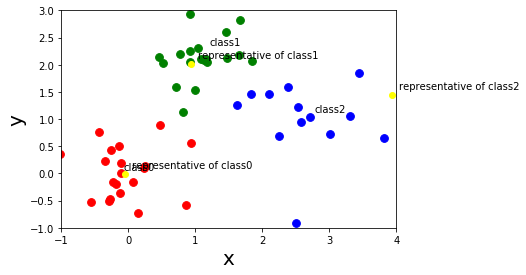

In [116]:
import numpy as np
import matplotlib.pyplot as plt

N = [10, 10, 10] # 各クラスの点の数
mu = [[0, 0],[1, 2],[3, 1]]  # 平均
sigma = [0.5, 0.5, 0.5]      # 分散
color = ['red', 'green', 'blue']

X = []; Y = []
for i in range(len(N)):
    x,y = [],[]
    p,s = mu[i],sigma[i]
    # 平均 p 分散 s でランダムサンプリングする。
    for j in range(N[i]):
        x.append(np.random.normal(p[0], s))
        y.append(np.random.normal(p[1], s))
    X.append(x)
    Y.append(y)

for i in range(len(N)):
    plt.text(np.average(X[i]), np.average(Y[i]), "class%d" % i)
    plt.scatter(X[i], Y[i], s=60, c=color[i])
plt.xlabel("x",size=20)
plt.ylabel("y",size=20)
plt.show()

<b><font size=4>◯テンプレートマッチング</font><br>
　各クラスを１つの<font color='Red'>代表ベクトル(representative vector) </font>で表現し, 代表ベクトルと入力 $\mathbf{x}$ の距離によって$\mathbf{x}$ が属すクラスを決定する手法を<font color='Red'>テンプレートマッチング (template matching)</font>と呼ぶ。<br>
最も単純な距離の測り方は<font color='Red'>ユークリッド距離(euclidean distance)</font>
$\|\mathbf{x}-\mathbf{\mu}_c||^2=(\mathbf{x}-\mathbf{\mu}_c)^T(\mathbf{x}-\mathbf{\mu}_c)$<br>
で測る方法である。

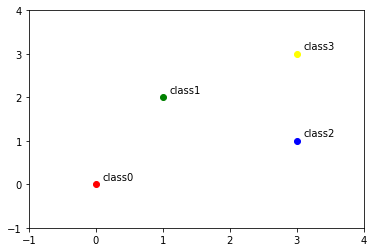

In [117]:
representative = [[0, 0],[1, 2],[3, 1],[3, 3]] # 各代表点の座標
color = ['red', 'green', 'blue', 'yellow']

def plot_points(points, cs):
    """点と色を与えたら、いい感じにプロットをする関数"""
    x_min,x_max = min(np.array(points).T[0]),max(np.array(points).T[0])
    y_min,y_max = min(np.array(points).T[1]),max(np.array(points).T[1])
    plt.xlim([x_min-1, x_max+1])
    plt.ylim([y_min-1, y_max+1])
    for i in range(len(points)):
        p = points[i]
        plt.plot(p[0], p[1], "bo", color=cs[i])
        plt.text(p[0]+0.1, p[1]+0.1, "class%d" % i)

plot_points(representative,color)
plt.show()

<b><font size=2>代表ベクトルが上記の様になっているならば, 特徴空間は以下の様に分割(<font color='Red'>ボロノイ分割 (Voronoi tessellation)</font>)される。</font></b>

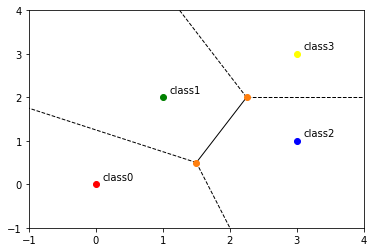

In [118]:
# 先の代表点を利用してボロノイ分割を行なった。
from scipy.spatial import Voronoi, voronoi_plot_2d
voronoi_plot_2d(Voronoi(representative))
plot_points(representative,color)
plt.show()

<b>学習データ $D$ をもとにした代表ベクトルの決定方法には複数の方法があるが、単純な方法は<font color='Red'>同じクラスに属する特徴ベクトルの重心</font>を代表ベクトルとする方法である。</b>

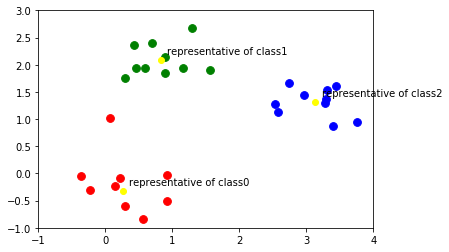

In [119]:
N = [10, 10, 10]
mu = [[0, 0],[1, 2],[3, 1]]
sigma = [0.5, 0.5, 0.5]
color = ['red', 'green', 'blue']

# データの準備
X,Y = [],[]
for i in range(len(N)):
    x,y = [],[]
    p,s = mu[i],sigma[i]
    for j in range(N[i]):
        x.append(np.random.normal(p[0], s))
        y.append(np.random.normal(p[1], s))
    X.append(x)
    Y.append(y)

def plot_points(X,Y):
    """点列を渡せば、中心の座標と合わせていい感じに表示する関数"""
    for i in range(len(N)):
        #各クラスの代表点（重心）
        xave = np.average(X[i])
        yave = np.average(Y[i])
        plt.text(xave+0.1, yave+0.1, "representative of class%d" % i)
        plt.plot(xave, yave, "bo", color='yellow')
        plt.scatter(X[i], Y[i], s=60, c=color[i])
    plt.xlim([-1,4])
    plt.ylim([-1,3])

plot_points(X,Y)
plt.show()

<b>　上記の点がそれぞれのクラスの代表点（重心）となり、これをもとに分類を行うと、以下の様に分類が行える。散らばり（重心）が大きい方の領域を大きめにとる、ということ。</b>

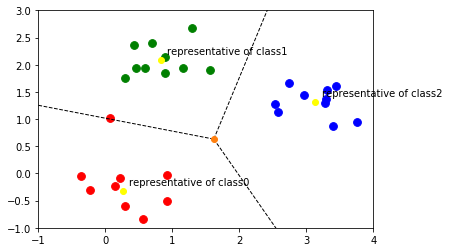

In [120]:
# 平均を与えたら自動的に分割してくれるみたい。
voronoi_plot_2d(Voronoi(np.array([np.average(X, axis=1), np.average(Y, axis=1)]).T))
plot_points(X,Y)
plt.show()

<b>　しかし、クラスによって<font color='Red'>分散が異なる場合</font>にユークリッド距離を使うと、平均情報しか残らないため、（分散情報が消えるため）以下の図のように<font color='Blue'>分散の大きいクラス</font>での識別精度が低下してしまう。</b>

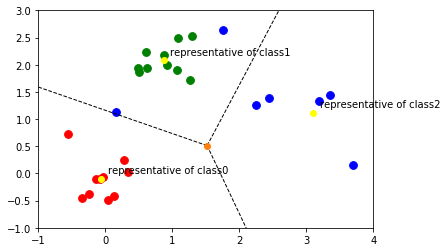

In [121]:
N = [10, 10, 10] # 数にも偏りを持たせる
mu = [[0, 0],[1, 2],[3, 1]]
sigma = [0.3, 0.3, 1.5] # 分散に偏りを持たせる
color = ['red', 'green', 'blue']

# データの準備
X,Y = [],[]
for i in range(len(N)):
    x,y = [],[]
    p,s = mu[i],sigma[i]
    for j in range(N[i]):
        x.append(np.random.normal(p[0], s))
        y.append(np.random.normal(p[1], s))
    X.append(x)
    Y.append(y)

def plot_points(X,Y):
    """点列を渡せば、中心の座標と合わせていい感じに表示する関数"""
    for i in range(len(N)):
        #各クラスの代表点（重心）
        xave = np.average(X[i])
        yave = np.average(Y[i])
        plt.text(xave+0.1, yave+0.1, "representative of class%d" % i)
        plt.plot(xave, yave, "bo", color='yellow')
        plt.scatter(X[i], Y[i], s=60, c=color[i])
    plt.xlim([-1,4])
    plt.ylim([-1,3])

voronoi_plot_2d(Voronoi(np.array([np.average(X, axis=1), np.average(Y, axis=1)]).T))
plot_points(X,Y)
plt.show()

<b>　これは, クラス $c$ の分布の分散共分散行列を $\mathbf{\Sigma}_c$ として $\mathbf{x}$ と代表ベクトル $\mathbf{\mu}_c$ の距離を
$(\mathbf{x}-\mathbf{\mu}_c)^T\mathbf{\Sigma}_c^{-1}(\mathbf{x}-\mathbf{\mu}_c)$
で測る事によって調整する事が出来る。これを <font color='Red'> マハラノビス距離 (Maharanobis distance)</font>と呼ぶ。$\mathbf{\Sigma}_c$ の真の値は一般には分からないため、標本分散(これは母分散の最尤推定量)などを代わりに使う。<br>
　分散が大きいやつほどインバースを取っていることから距離を小さめに見積もっているため、範囲が広くなる。

<b>　先の例をマハラノビクス距離で識別すると、以下の様になる。各曲線はクラス間の識別面であり、これらは二次曲線となっている。</b>

In [124]:
plt.clf()
plot_points(X,Y)
X, Y = np.meshgrid(np.arange(xrng[0], xrng[1], 0.1), np.arange(yrng[0], yrng[1], 0.1))
diff = [((X-np.average(X[i]))**2 + (Y-np.average(Y[i]))**2)/sigma[i]**2 for i in range(len(N))]

np.contour(X, Y, (diff[0]-diff[1]), [0])
np.contour(X, Y, (diff[0]-diff[2]), [0])
np.contour(X, Y, (diff[1]-diff[2]), [0])
show()

NameError: name 'xrng' is not defined

***

<b><font size=4>◯マルチテンプレート法</font><br>
<b>　代表ベクトルを複数持たせる事によってより複雑な分布を表現するという方法<font color='Red'>(マルチテンプレート法 )</font>もある。代表ベクトルの決め方は難しいが、クラスタリングなどの手法を併用することで決定する。</b>

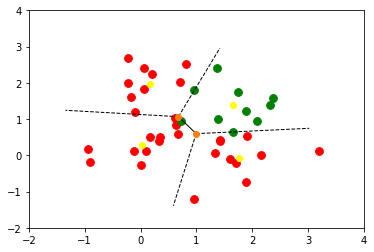

In [16]:
# 図を作るためのコードなので代表ベクトルは決め打ちで作っている。
N = [10, 10, 10, 10]
mu = [array([0, 0]), array([2, 0]), array([0, 2]), array([1.5,1.5])]
cat = [0, 0, 0, 1]
sigma = [0.5, 0.5]
color = ['red', 'green']
xrng = [-2, 4]
yrng = [-2, 4]

xs = []; ys = []
xavg = []; yavg = []
for i in range(len(N)):
    x = []
    y = []
    p = mu[i]
    s = sigma[cat[i]]
    for j in range(N[i]):
        x.append(random.normal(p[0], s))
        y.append(random.normal(p[1], s))
    xs.append(x)
    ys.append(y)
    xavg.append(average(x))
    yavg.append(average(y))

def plot_points(repr):
    xlim(xrng)
    ylim(yrng)
    for i in range(len(N)):
        if repr:
            plot(xavg[i], yavg[i], "bo", color='yellow')
        scatter(xs[i], ys[i], s=60, c=color[cat[i]])

voronoi_plot_2d(Voronoi(array([xavg, yavg]).T))
plot_points(True)
show()

***

<b><font size=4>◯$k$近傍法</font><br>
　入力 $\mathbf{x}$ に対して学習データを近い順番に $k$ 個選び, 多数決によって $\mathbf{x}$ が属すクラスを決定する手法を<font color='Red'> $k$近傍法 ($k$-nearest-neighbours classification rule, $k$-NN法) </font> と呼ぶ。<br>
　例えば、以下の$\mathbf{x}$は5-NN法ではクラス0に分類される。

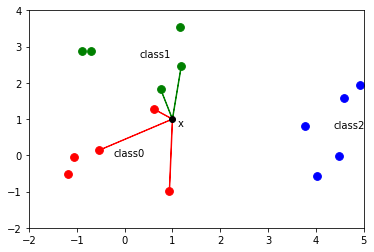

In [30]:
K = 5
N = [5, 5, 5] # 各グループの個数
mu = [array([0, 0]), array([1, 3]), array([4, 1])]
sigma = [0.8, 0.8, 0.8]
color = ['red', 'green', 'blue']
xrng = [-2, 5]
yrng = [-2, 4]

xs = []; ys = []
for i in range(len(N)):
    x = []
    y = []
    p = mu[i]
    s = sigma[i]
    for j in range(N[i]):
        x.append(random.normal(p[0], s))
        y.append(random.normal(p[1], s))
    xs.append(x)
    ys.append(y)

xlim(xrng)
ylim(yrng)
for i in range(len(N)):
    text(average(xs[i]), average(ys[i]), "class%d" % i)
    scatter(xs[i], ys[i], s=60, c=color[i])

# input
x,y = 1,1 # 例の座標
# 上の座標との点を全て求める。
distance = []
for i in range(len(N)):
    for j in range(N[i]):
        distance.append( (i, j, (xs[i][j]-x)**2 + (ys[i][j]-y)**2) )

plot(x, y, "bo", color="black")
text(x+0.1, y-0.2, "x")
distance = sorted(distance, key=lambda x: x[2])

# 距離が近いものK個と線を結ぶ。
for k in range(K):
    i,j,d = distance[k]
    arrow(x, y, xs[i][j]-x, ys[i][j]-y, color=color[i], width=0.01)
show()

<b>　$k$-NN法は単純な方法で複雑な識別面を表現する事ができ、学習データが十分にある場合には非常に良い識別精度を発揮する。<br>
　しかしその一方で <font color='Red'>$k$ が小さすぎると( $k=1$ )学習データのノイズを拾ってしまう。</font> $k$ の決定については後の回にやる。<br>
　また、<font color='Red'>$k$近傍法では学習データ集合 $D$ が大きいほど計算量が大きくなってしまう</font>上、 $D$ 全体を保存しておかなければならないという問題点もある。</b>

<b>　学習データが密に分布している場合は<font color='Red'> kdツリー</font> などの空間分割アルゴリズムが効果的である。疎に分布している場合には近似的な最近傍探索アルゴリズムが利用される。これも詳しくは後の回に紹介する。</font>

<b>　空間を二分木のようなイメージで分割し、自分に近いものから近傍の点を探索し、少しずつ広げていく。</b>

***

<b><font size=4>◯識別関数</font><br>
　クラス毎に<font color='Red'> 識別関数 (dicriminant function) </font>$f_c: \Omega \rightarrow \mathbb{R}$を定め、この値が最小(もしくは最大)となる $c$ を $\mathbf{x}$ のクラスとする方法を考える事が出来る。<br>
　ユークリッド距離によるテンプレートマッチング法は$f_c(\mathbf{x}) = ||\mathbf{x}-\mathbf{\mu}_c||^2$<br>
　マハラノビス距離によるテンプレートマッチング法は$f_c(\mathbf{x}) = (\mathbf{x}-\mathbf{\mu}_c)^T\mathbf{\Sigma}_c^{-1}(\mathbf{x}-\mathbf{\mu}_c)$<br>
という識別関数によって表す事が出来る。<br>
　従ってテンプレートマッチングは識別関数による識別法の１つである。

<b>　問題は識別関数 $f_c(\mathbf{x})$ をどのように決定するのかということ。<br>

　１つ目の方法は, テンプレートマッチング法の様に幾何学的な考察を行う事である。後の回に紹介するが、他には部分空間法などの手法がある。<br>
　２つ目の方法は $f_c(\mathbf{x})$ を <font color='Red'> パラメトリックモデル (parametric model)</font> $f_c(\mathbf{x},\mathbf{a})$ として
        表現し, <font color='Red'>パラメータ $\mathbf{a}$ に関する最適化問題に帰着する</font>事です.

<b>　パラメトリックモデルというのは、いくつかの未知パラメータによって決定されるモデルの事である。<br>
　例えば, <font color='Red'>線形識別関数 (linear discriminant function)</font>と呼ばれるモデルは$\begin{aligned}
        f_c(\mathbf{x}) &= \mathbf{a}_c^T\mathbf{x}+b_c  \\
        &= a_{c1}x_1 + a_{c2}x_2 + \cdots + a_{cm}x_m + b_c
        \end{aligned}$<br>
　と表される。<font color='Red'>関数の大体の形を決めておいてパラメータのみを決定する</font>という手法のことである。<br></b>

<b>　クラス $c_1,c_2$ の間の識別面は$\small{\begin{aligned}
        &f_{c_1}(\mathbf{x})=f_{c_2}(\mathbf{x})\\
        \Leftrightarrow &(a_{c_11}-a_{c_21})x_1+\cdots+(a_{c_1m}-a_{c_2m})x_m+(b_{c_1}-b_{c_2}) = 0
        \end{aligned}}$<br>
        より平面となるため、<font color='Red'>線形識別関数を使うと特徴空間は平面で区切られて行くことになる。</font></b>

<b>　実は、ユークリッド距離によるテンプレートマッチングは線形識別関数による識別と等価である。というのも、
$||\mathbf{x}-\mathbf{\mu}_c||^2 = ||\mathbf{x}||^2 -2\mathbf{\mu}_c^T\mathbf{x}+||\mathbf{\mu}_c||^2$
であり, $||\mathbf{x}||^2$ は $c$ によらないため、 $||\mathbf{x}-\mathbf{\mu}_c||^2$ が最小となるのは、
線形識別関数 $f_c(\mathbf{x})=\mathbf{\mu}_c^T\mathbf{x}-\frac{1}{2}||\mathbf{\mu}_c||^2$が最大となる時である。( $||\mathbf{x}-\mathbf{\mu}_c||^2 = ||\mathbf{x}||^2 - 2f_c(\mathbf{x})$ )

<b>　既知のベクトル値関数 $\Psi: \Omega \rightarrow \mathbb{R}^m$ によって
        $ \begin{aligned}
        f_c(\mathbf{x}) = \mathbf{a}_c^T\Psi(\mathbf{x})= a_{c1}\psi_1(\mathbf{x}) + a_{c2}\psi_2(\mathbf{x}) + \cdots + a_{cm}\psi_m(\mathbf{x})
        \end{aligned}$<br>
        と表されるモデルは <font color='Red'> 一般化線形識別関数 (generalized linear discriminant function) </font> 
        と呼ばる。(パラメータについて線形だから。)<br>
        　つまり, 特徴ベクトルを $\Psi$ で変換してから線形識別関数で識別するというモデルである。<br>
　例えば, 入力が一次元の時、
        $\psi_i(x) = x^i \qquad (0\leq i \leq m)$
        とおけば、一般化線形識別関数は
        $ f_c(x) = a_0 + a_1x + a_2x^2 + \cdots + a_mx^m $
        となる。これは $k$ 次の<font color='Red'> 多項式モデル (polynomial model) </font>に他ならない。</b>        

***

<b>　パラメータを最適化する為の評価基準は様々考える事が出来るが、今回は<font color='Red'> 平均二乗誤差最小化 (least mean squared error)</font> による手法を紹介する。</b>

<b>　まず, クラスが全部で $k$ 個あるとしてそれをそれらを $c_1,c_2,\ldots,c_k$ とする。<br>
識別関数を束にした関数
        $\mathbf{f}(\mathbf{x}) = (f_{c_1}(\mathbf{x}),f_{c_2}(\mathbf{x}),\ldots,f_{c_k}(\mathbf{x}))^T $
        と各 $c_i$ に対して $i$ 番目だけが $1$ のベクトル
        $ \mathbf{p}_{c_i} = (0,0,\ldots,0,1,0,\ldots,0,0)^T $
        を定める。<br>
<b>　学習データ $D=\{(\mathbf{x}_1,y_1),\ldots,(\mathbf{x}_n,y_n)\}$ に対して、$ \frac{1}{n}\sum_{i=1}^n || \mathbf{f}(\mathbf{x}_i) - \mathbf{p}_{y_i}||^2 $ を<font color='Red'>平均二乗誤差</font>と呼ぶ。これが最小化となるように各 $\mathbf{a}_c$ を決定する。<br>
　つまり、 $\mathbf{f}(\mathbf{x}_i)$ と $\mathbf{p}_{y_i}$ が出来るだけ近づく様に最適化を行う。</b>

<b>　一般化線形識別関数の場合にはパラメータを直接求める事が出来るため、以下に例を挙げる。</b>

<b>$f_c(\mathbf{x}) = \mathbf{a}_c^T\Psi(\mathbf{x}) $
        を代入すると、<br>
        $ \begin{aligned}
        \mathbf{f}(\mathbf{x}) &= (\mathbf{a}_{c_1}^T\Psi(\mathbf{x}), \mathbf{a}_{c_2}^T\Psi(\mathbf{x}),\ldots,\mathbf{a}_{c_k}^T\Psi(\mathbf{x}))^T \\
        &= (\mathbf{a}_{c_1},\mathbf{a}_{c_2},\dots,\mathbf{a}_{c_k})^T\Psi(\mathbf{x})
        \end{aligned}$<br>
        となるので, $\mathbf{A} = (\mathbf{a}_{c_1},\mathbf{a}_{c_2},\ldots,\mathbf{a}_{c_k})$ と置けば、
        $ \mathbf{f}(\mathbf{x})=\mathbf{A}^T\Psi(\mathbf{x}) $
        となる。

<b>従って、\begin{aligned}
        \sum_{i=1}^n||\mathbf{f}(\mathbf{x}_i)-\mathbf{p}_{y_i}||^2 &= \sum_{i=1}^n||\mathbf{A}^T\Psi(\mathbf{x}_i)-\mathbf{p}_{y_i}||^2 \\
        &= \sum_{i=1}^n (\Psi(\mathbf{x}_i)^T\mathbf{A}-\mathbf{p}_{y_i}^T)(\mathbf{A}^T\Psi(\mathbf{x}_i)-\mathbf{p}_{y_i}) \\
        &= \sum_{i=1}^n \left\{ \Psi(\mathbf{x}_i)^T\mathbf{A}\mathbf{A}^T\Psi(\mathbf{x}_i)-2\Psi(\mathbf{x}_i)^T\mathbf{A}\mathbf{p}_{y_i}+||\mathbf{p}_{y_i}||^2 \right\}
        \end{aligned} 
        となるので、これを $g(\mathbf{A})$ とおいて $\mathbf{A}$ で微分(末尾に補足説明)すると、<br>
        $ \frac{\partial g(\mathbf{A})}{\partial \mathbf{A}} = 2\sum_{i=1}^n\left\{\Psi(\mathbf{x}_i)\Psi(\mathbf{x}_i)^T\mathbf{A}-\Psi(\mathbf{x}_i)\mathbf{p}_{y_i}^T\right\} $
        となる。

<b>　これは、 \begin{aligned}
        \mathbf{X} &= (\Psi(\mathbf{x}_1),\Psi(\mathbf{x}_2),\ldots,\Psi(\mathbf{x}_n))^T \\
        \mathbf{P} &= (\mathbf{p}_{y_1},\mathbf{p}_{y_2},\ldots,\mathbf{p}_{y_n})^T \\
        \end{aligned}
        と置けば、
        $\frac{\partial g(\mathbf{A})}{\partial \mathbf{A}} = 2(\mathbf{X}^T\mathbf{X}\mathbf{A}-\mathbf{X}^T\mathbf{P})$
        と表されるので、平均二乗誤差が最小となるのは勾配が０、つまり
        $ \frac{\partial g(\mathbf{A})}{\partial \mathbf{A}}=O\Leftrightarrow \mathbf{X}^T\mathbf{X}\mathbf{A}=\mathbf{X}^T\mathbf{P} $
        が成立する時となる。

<b>　特に $\mathbf{X}^T\mathbf{X}$ が正則ならば、
        $ \color{red}{ \mathbf{A} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{P} } $
        が求めるパラメータである。<br>
<b>　一般に $\mathbf{X}^T\mathbf{X}$ が正則でないならば、 $\mathbf{X}$ の擬似逆行列 $\mathbf{X}^+$ によって
        $ \color{red}{ \mathbf{A} = \mathbf{X}^+\mathbf{P} } $
        となる。

***

<b>　以下で、平均二乗誤差最小化による一般化線形識別関数の構築を行う。そこで、まずは以下のデータをサンプルとして使い、線形識別関数
        $ f_c(\mathbf{x}) = a_{c0}x_0 + a_{c1}x_1 + a_{c2} $
        での識別を行ってみる。</b>

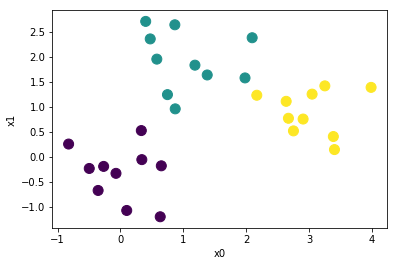

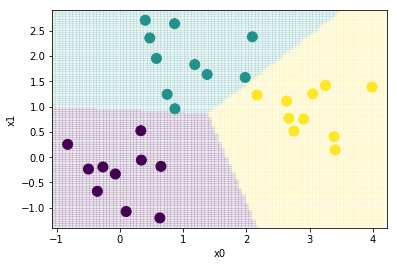

In [98]:
import matplotlib.pyplot as plt
import sys
from scipy import linalg

class_num = 3
Ns = [10, 10, 10] # 各クラスの個数
mu = [[0, 0],[1, 2],[3, 1]] # 各クラスの平均
sigma = [0.5, 0.5, 0.5] # 各クラスの分散

xs,ys,cs = [],[],[]
for i in range(len(Ns)): # クラスごと
    for j in range(Ns[i]): # 各クラスの個数分
        xs.append(random.normal(mu[i][0], sigma[i])) # 座標の情報
        ys.append(random.normal(mu[i][1], sigma[i]))
        cs.append(i) # クラスラベル
        
plt.scatter(xs,ys,c=cs,s=100) # ※s=size
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

"""ここから、この散布図を線形識別関数によって識別する"""
xs = np.c_[xs,ys]   # 学習データ [[x0,y0], [x1,y1], ...]
cs = cs             # 正解クラス [c0, c1, ...]
K = class_num       # クラスの数
N = len(xs)         # 学習データの数

"""サンプルごとに、分解して特徴ベクトルを作成する関数"""
def phi(x):
    return [x[0], x[1], 1] # x+y+1を作成
    #return [x[0]**2, x[1]**2, x[0]*x[1], x[0], x[1], 1]

X = np.array([phi(xs[i]) for i in range(N)])
P = np.eye(K)[cs]  # 正解クラスのone-hotベクトルを作成

"""X^TXA = X^TP を満たす A が求めるパラメータを解析的に計算する"""
A = linalg.solve(X.T.dot(X), X.T.dot(P))
# A = linalg.pinv(X).dot(P)            # 擬似逆行列を使う場合
# A,residues,rank,s=linalg.lstsq(X, P) # 最小二乗法を使う場合

"""正解ラベルとの距離（ユークリッド距離）を求める関数"""
def distance(x, i, K):
    t = np.eye(K)[i]
    return linalg.norm(x-t)

"""(x, y) と one-hotベクトルとの距離が最小のクラスに分類"""
def classify(x, y):
    p = A.T.dot(phi([x, y])) 
    return argmin([distance(p, i, K) for i in range(K)])

"""結果の可視化(少しずつ幅を広げている)"""
xmin = min(xs[:,0]); xmax = max(xs[:,0])
ymin = min(xs[:,1]); ymax = max(xs[:,1])
xadd = (xmax-xmin)/20
yadd = (ymax-ymin)/20
xmin -= xadd
xmax += xadd
ymin -= yadd
ymax += yadd
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

# np.lineplace(始点,終点,間隔) で点列を作成。
# np.meshgrid(X,Y) でYの個数分Xを作成、Xの個数分Yを作成する。
# np.vectorize(func)で、functionの引数にベクトルを取れるようにする。
X, Y = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
Z = np.vectorize(classify)(X, Y)
plt.pcolor(X, Y, Z, alpha=0.1)
plt.scatter(xs[:,0], xs[:,1], c=cs, s=100)
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

In [ ]:
import sys
from scipy import linalg
data = loadtxt("data1-8-1", delimiter="\t") # 上の情報を読み込む
xs = data[0:2,:].T   # 学習データ [[x0,y0], [x1,y1], ...]
cs = int_(data[2,:]) # 正解クラス [c0, c1, ...]
# 学習データの数
N = len(xs)
# クラスの数
K = max(cs)+1

#### 特徴ベクトルの変換関数 ####
def phi(x):
    return [x[0], x[1], 1]
    #return [x[0]**2, x[1]**2, x[0]*x[1], x[0], x[1], 1]

#### パラメータの最適化 ####
# phi(特徴ベクトル)を行に並べた行列
X = array([ phi(xs[i]) for i in range(N) ])

# 正解クラス番号の成分だけ1にしたベクトルpを行に並べた行列
P = zeros([N, K])
for i in range(N):
    P[i, cs[i]] = 1

# X^TXA = X^TP を満たす A が求めるパラメータ
A = linalg.solve(X.T.dot(X), X.T.dot(P))

# 擬似逆行列を使う場合
# A = linalg.pinv(X).dot(P)

# 最小二乗法を実行してくれる関数もあります
# A,residues,rank,s=linalg.lstsq(X, P)

#### 識別器の構築 ####
def distance(x, i):
    t = zeros(K)
    t[i] = 1
    return linalg.norm(x-t)

# (x, y) と (0,...,0,1,0,...,0) の距離が最小のクラスに分類
def classify(x, y):
    p = A.T.dot(phi([x, y]))
    return argmin([distance(p, i) for i in range(K)])

#### どんな感じで空間が分割されたか見てみましょう ####
# 表示領域の設定
xmin = min(xs[:,0]); xmax = max(xs[:,0])
ymin = min(xs[:,1]); ymax = max(xs[:,1])
xmin -= (xmax-xmin)/20
xmax += (xmax-xmin)/20
ymin -= (ymax-ymin)/20
ymax += (ymax-ymin)/20
xlim(xmin, xmax)
ylim(ymin, ymax)

X, Y = meshgrid(linspace(xmin, xmax, 100), linspace(ymin, ymax, 100))
Z = vectorize(classify)(X, Y)
pcolor(X, Y, Z, alpha=0.1)
scatter(xs[:,0], xs[:,1], c=cs, s = 50, linewidth=0)
show()

***

<b>　続いて以下のような学習データでやってみる。<br>
今度は変数について2次の識別関数
        $ f_c(\mathbf{x}) = a_{c0}x_0^2 + a_{c1}x_1^2 + a_{c2}x_0x_1 + a_{c3}x_0 + a_{c4}x_1 + a_{c5} $
        を使ってみる。</b>

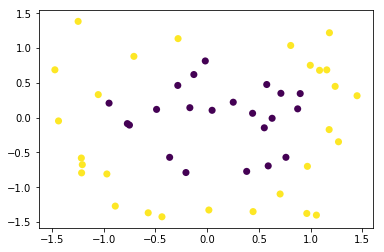

In [45]:
N = 50

# ’PˆÊ‰~ x^2+y^2=1 ‚Ì“à‚ÆŠO‚Ì2ƒNƒ‰ƒX‚É‚µ‚Ä‚Ý‚Ü‚·
xs = []; ys = []; cs = []
for i in range(N):
    x = random.uniform(-1.5, 1.5)
    y = random.uniform(-1.5, 1.5)
    xs.append(x); ys.append(y)
    if x**2 + y**2 < 1:
        cs.append(0)
    else:
        cs.append(1)

scatter(xs, ys, c=cs, s=50, linewidth=0)
show()
savetxt("data1-8-3", [xs,ys,cs], delimiter="\t")

<b>　結果は以下のようになる。なお、線形識別機の時とコードで変わっているのは、以下の点である。<br>
```
def phi(x):
    # return [x[0], x[1], 1] ←先ほどはこっち。
    return [x[0]**2, x[1]**2, x[0]*x[1], x[0], x[1], 1] ←今回
```

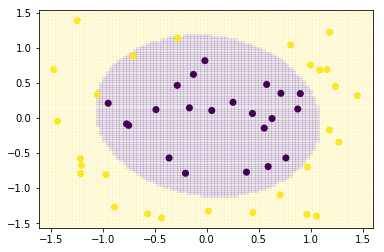

In [48]:
data = loadtxt("data1-8-3", delimiter="\t")

xs = data[0:2,:].T   # 学習データ [[x0,y0], [x1,y1], ...]
cs = int_(data[2,:]) # 正解クラス [c0, c1, ...]

# 学習データの数
N = len(xs)

# クラスの数
K = max(cs)+1

#### 特徴ベクトルの変換関数 ####
def phi(x):
    # return [x[0], x[1], 1]
    return [x[0]**2, x[1]**2, x[0]*x[1], x[0], x[1], 1]

#### パラメータの最適化 ####
# phi(特徴ベクトル)を行に並べた行列
X = array([ phi(xs[i]) for i in range(N) ])

# 正解クラス番号の成分だけ1にしたベクトルpを
# 行に並べた行列
P = zeros([N, K])
for i in range(N):
    P[i, cs[i]] = 1

# X^TXA = X^TP を満たす A が求めるパラメータ
A = linalg.solve(X.T.dot(X), X.T.dot(P))

# 擬似逆行列を使う場合
# A = linalg.pinv(X).dot(P)

# 最小二乗法を実行してくれる関数もあります
# A,residues,rank,s=linalg.lstsq(X, P)

#### 識別器の構築 ####
def distance(x, i):
    t = zeros(K)
    t[i] = 1
    return linalg.norm(x-t)

# (x, y) と (0,...,0,1,0,...,0) の距離が最小のクラスに分類
def classify(x, y):
    p = A.T.dot(phi([x, y]))
    return argmin([distance(p, i) for i in range(K)])

#### どんな感じで空間が分割されたか見てみましょう ####
# 表示領域の設定
xmin = min(xs[:,0]); xmax = max(xs[:,0])
ymin = min(xs[:,1]); ymax = max(xs[:,1])
xmin -= (xmax-xmin)/20
xmax += (xmax-xmin)/20
ymin -= (ymax-ymin)/20
ymax += (ymax-ymin)/20
xlim(xmin, xmax)
ylim(ymin, ymax)

X, Y = meshgrid(linspace(xmin, xmax, 100), linspace(ymin, ymax, 100))
Z = vectorize(classify)(X, Y)
pcolor(X, Y, Z, alpha=0.1)
scatter(xs[:,0], xs[:,1], c=cs, s = 50, linewidth=0)
show()

***

<b><font size=4>◯識別器を組み合わせる。</font><br>
　単純な識別器を複数組み合わせる事によって、精度を向上させる事が出来ると期待出来る。というのも、例えば線形識別関数は平面で領域を分割する事しか出来ないが、それを複数組み合わせれば楕円領域を表す事も出来るからである。<br>
　以下では、識別器を複数組み合わせる事によって精度を向上させている例を挙げる。

<b><font size=3>・決定木</font><br>
　複数の識別器を使って段階的に識別を行っていく方法を<font color='Red'>決定木 (decision tree)</font>による識別と言う。この手法では、最初は大まかに分類していきながら徐々に細かい特徴を見ていく。<br>
　決定木を自動的に構築する問題も非常に難しい。<br>
　ルートから再帰的に入力の分割を行っていくのだが、どの識別器を使うのか？
構築を終了出来る条件は何か？という事を考える必要がある。<br>
　なお、この手法のメリットとして<font color='Red'>計算コストの低下</font>が挙げられる。複数の特徴量を一度に入れると計算量が掛け算で効いてくるが、小分けにする事によって足し算で効いてくるからである。これは、計算量がベクトルの長さに影響することによる。

<b><font size=3>・ニューラルネットワーク</font><br>
　神経細胞を模したような単純な識別器をネットワーク状に結合して出来上がる識別器を<font color='Red'> ニューラルネットワーク (neural network)</font>と呼ぶ。
　ニューラルネットワークの素子では、各入力に重み $w_1,w_2,\ldots,w_m$ としきい値 $\theta$ が定められており、
$ x_1w_1 + x_2w_2 + \cdots + x_mw_m > \theta $
であるならば $1$ を、そうでなければ $0$ を出力する。

　$ x_1w_1 + x_2w_2 + \cdots + x_mw_m = \theta $
は平面なので、素子１つは入力の空間を平面で切るという非常に単純なものである。
これをネットワーク状に結合する事によって全体として非常に複雑な識別面を形成する事が出来る。<br>
　ニューラルネットワークも重み$\mathbf{w}$ としきい値 $\mathbf{\theta}$ というパラメータを持つパラメトリックモデルと考える事が出来る。<br>
　パラメータの学習には <font color='Red'> バックプロパゲーション (backpropagation)</font> という手法が有名である。これも後の回に扱う。

<b><font size=3>・集団学習</font><br>
　識別器を組み合わせる方法として、単純な識別器の結果の多数決を取るという方法も考えられます. これは<font color='Red'>集団学習(ensemble learning)</font>という方法である。<br>
　同じ学習データで同じ学習をしたら同じ識別器が出来上がってしまうため、使用する学習データのサブセットや学習方法を変えながら個々の識別器を構築する。<br>

　有名な<font color='Red'> バギング (bagging)</font>と<font color='Red'>ブースティング (boosting)</font>について、後の回に紹介する。</b>

<b>　第１回はここで終わり。<br>
　パターン認識という技術がどのようなものであるかは理解していただけたと思う。<br>
　次回はベイズ統計の復習をした後、識別器の評価や事前知識の利用といった基礎的な話題を進めていく。</b>

***
***

<b><font size=4>◯補足: ベクトル・行列でのスカラー関数の微分 </font><br>

　スカラー関数 $f(\mathbf{x})$ に対してその<font color='Red'>ベクトル $\mathbf{x}$ での微分係数</font>を
        $ \frac{\partial f(\mathbf{x})}{\partial \mathbf{x}} = \left(
        \frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots,\frac{\partial f(\mathbf{x})}{\partial x_n}\right)^T $
        と定める。つまりこれは勾配
        $ \frac{\partial f(\mathbf{x})}{\partial \mathbf{x}}=\mathrm{grad} f(\mathbf{x}) $
        に他ならないため、極値をとる点では
        $\frac{\partial f(\mathbf{x})}{\partial \mathbf{x}}=\mathbf{0} $
        となる。<br>
        　定数 $c$ に対しては当然
        $ \frac{\partial c}{\partial \mathbf{x}} = \mathbf{0} $
        となる。
定数ベクトルとの内積 $\mathbf{a}^T\mathbf{x}=\mathbf{x}^T\mathbf{a}$ に対しては、成分計算をしてみると
        $ \frac{\partial}{\partial\mathbf{x}}\mathbf{a}^T\mathbf{x} = \frac{\partial}{\partial\mathbf{x}}\mathbf{x}^T\mathbf{a}=\mathbf{a} $
        である事がわかる。</b>

<b>　二次形式
        $ \mathbf{x}^T\mathbf{A}\mathbf{x} = \sum_{i,j} a_{ij}x_ix_j $
        については、
        \begin{aligned}
        \frac{\partial}{\partial x_k} \mathbf{x}^T\mathbf{A}\mathbf{x} &= \sum_{i,j} a_{ij}\frac{\partial}{\partial x_k} x_ix_j=\sum_{i,j}a_{ij}(x_j\delta_i^k+x_i\delta_j^k) \\
        &= \sum_j a_{kj}x_j + \sum_i a_{ik}x_i
        \end{aligned} <br>
        なので、
        $ \frac{\partial}{\partial \mathbf{x}} = (\mathbf{A}+\mathbf{A}^T)\mathbf{x} $
        となる。( $\delta_{ij}$ はクロネッカーのデルタ )<br>        
        　特に、$||\mathbf{A}\mathbf{x}||^2$ については
        $ ||\mathbf{A}\mathbf{x}||^2 = \mathbf{x}^T\mathbf{A}^T\mathbf{A}\mathbf{x} $
        なので、
        $ \frac{\partial}{\partial\mathbf{x}}||\mathbf{A}\mathbf{x}||^2 = (\mathbf{A}^T\mathbf{A}+(\mathbf{A}^T\mathbf{A})^T)\mathbf{x} = 2\mathbf{A}^T\mathbf{A}\mathbf{x} $<br>
        となる。

<b>　よって例えば, 
        $ || \mathbf{A}\mathbf{x}-\mathbf{b}||^2 = ||\mathbf{A}\mathbf{x}||^2-2\mathbf{x}^T\mathbf{A}^T\mathbf{b}+||\mathbf{b}||^2 $
        を最小にする $\mathbf{x}$ は
        $ \frac{\partial}{\partial\mathbf{x}}||\mathbf{A}\mathbf{x}-\mathbf{b}||^2 = 2(\mathbf{A}^T\mathbf{A}\mathbf{x}-\mathbf{A}^T\mathbf{b}) $
        より
        $ \mathbf{A}^T\mathbf{A}\mathbf{x}=\mathbf{A}^T\mathbf{b} $
        の解となる。<br>
        　これは最小二乗法による回帰分析などでよく出てくる方程式である。

<b>　同様に、行列変数 $\mathbf{X}=(\mathbf{x}_1,\mathbf{x}_2,\ldots,\mathbf{x}_m)$ を引数に取るスカラー関数 $f(\mathbf{X})$ に対して、<font color='Red'>行列 $\mathbf{X}$ での微分係数</font>を
        $ \frac{\partial f(\mathbf{X})}{\partial \mathbf{X}} = \left(
        \frac{\partial f(\mathbf{X})}{\partial\mathbf{x}_1},
        \frac{\partial f(\mathbf{X})}{\partial\mathbf{x}_2},\ldots,
        \frac{\partial f(\mathbf{X})}{\partial\mathbf{x}_m},
        \right) $
        $f(X)$ が極値を取るならば、全ての方向の勾配が $\mathbf{0}$ になるので
        $ \frac{\partial f(\mathbf{X})}{\partial \mathbf{X}} = \mathbf{O} $
        となる。</b>

<b>　ベクトルの場合と同様に公式を導くと、定数 $c$ については
        $ \frac{\partial}{\partial\mathbf{X}}c = \mathbf{O} $
        である。</b>

<b>　$\mathbf{a}^T\mathbf{X}\mathbf{b}$ に対しては、
        $ \mathbf{a}^T\mathbf{X}\mathbf{b}=\sum_{i,j}a_iX_{ij}b_j $
        なので、
        $ \frac{\partial}{\partial X_{kl}}\mathbf{a}^T\mathbf{X}\mathbf{b}=\sum_{i,j}a_i\delta_i^k\delta_j^lb_j = a_kb_l $
        であるから、
        $ \frac{\partial}{\partial \mathbf{X}}\mathbf{a}^T\mathbf{X}\mathbf{b} = \mathbf{a}\mathbf{b}^T $ である。</b>

<b>　$\mathbf{a}^T\mathbf{X}\mathbf{X}^T\mathbf{b}$ については
        $ \mathbf{a}^T\mathbf{X}\mathbf{X}^T\mathbf{b} = \sum_{i,j,k}a_iX_{ik}X_{jk}b_j $
        なので、
        \begin{aligned}
        \frac{\partial}{\partial X_{pq}} &= \sum_{i,j,k}a_i(\delta_i^p\delta_k^qX_{jk}+\delta_k^p\delta_j^qX_{ik})b_j \\
        &= \sum_j a_pX_{jq}b_j + \sum_ia_iX_{ip}b_q \\
        \end{aligned}
        となる。よって、
        $ \frac{\partial}{\partial \mathbf{X}}\mathbf{a}^T\mathbf{X}\mathbf{X}^T\mathbf{b} = (\mathbf{a}\mathbf{b}^T+\mathbf{b}\mathbf{a}^T)X $となる。 $\mathbf{a}^T\mathbf{X}^T\mathbf{X}\mathbf{b}$ などについても同様に計算を行うことで求めることができる。

***
***

<b><font size=4>◯おすすめ参考書</font></b><br>
<b><font size=3>[パターン認識と学習の統計学――新しい概念と手法【統計科学のフロンティア6】 (岩波オンデマンドブックス)](https://www.amazon.co.jp/パターン認識と学習の統計学-新しい概念と手法-統計科学のフロンティア6-岩波オンデマンドブックス-麻生-英樹/dp/400730744X/ref=dp_ob_title_bk)<br>
[パターン認識と学習の統計学](https://www.amazon.co.jp/パターン認識と学習の統計学―新しい概念と手法-統計科学のフロンティア-6-甘利-俊一/dp/4000068466)（上のものの古いバージョン）<br>
※なお、[PRML(パターン認識と機械学習)](https://www.amazon.co.jp/パターン認識と機械学習-上-C-M-ビショップ/dp/4621061224/ref=sr_1_1?ie=UTF8&qid=1537670232&sr=8-1&keywords=パターン認識と機械学習)も名著だが、かなり壮大な書物のため、初学者にはオススメしない。</font></b>